In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [248]:
def eh_impar(x):
    if x % 2 != 0:
        return x
    else:
        return 2*x + 1

In [249]:
n = eh_impar(7)

matriz = np.zeros([n,2*n +1])

In [250]:
n

7

In [251]:
matriz[0][int(n)] = 1

matriz


#for i in range(int(n/2)):
    

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [258]:
for i in range(n-1):
    for j in range(2*n-2):
        if matriz[i][j] != 0:
            matriz[i+1][j-1] = int(matriz[i][j] + matriz[i][j-2])
            matriz[i+1][j+1] = int(matriz[i][j] + matriz[i][j+2])
        
    

In [259]:
matriz

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  3.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  4.,  0.,  6.,  0.,  4.,  0.,  1.,  0.,
         0.,  0.],
       [ 0.,  0.,  1.,  0.,  5.,  0., 10.,  0., 10.,  0.,  5.,  0.,  1.,
         0.,  0.],
       [ 0.,  1.,  0.,  6.,  0., 15.,  0., 20.,  0., 15.,  0.,  6.,  0.,
         0.,  0.]])

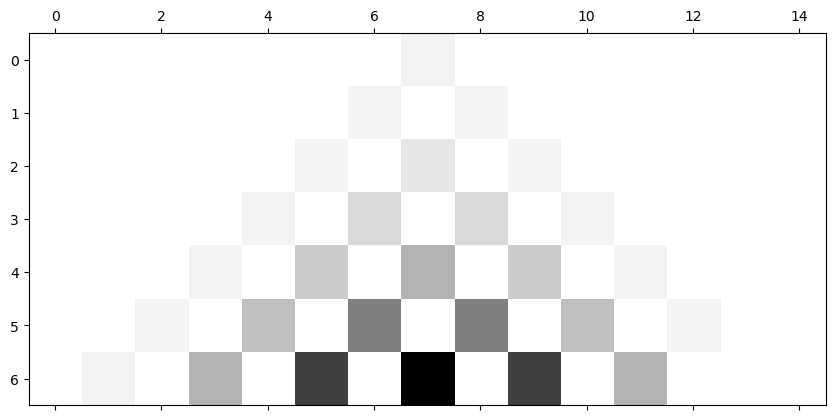

In [260]:
plt.matshow(matriz, cmap = 'binary', vmin = 0)

#for (i, j), z in np.ndenumerate(matriz):
#    if z != 0:
#        plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
plt.show()

In [261]:
## agora q temos a matriz, podemos brincar com ela

for i in range(n):
    for j in range(2*n):
        if matriz[i][j] != 0:
            if matriz[i][j] % 2 == 1:
                matriz[i][j] = 1
            
            if matriz[i][j] % 2 == 0:
                matriz[i][j] = 0
                
            
            
        

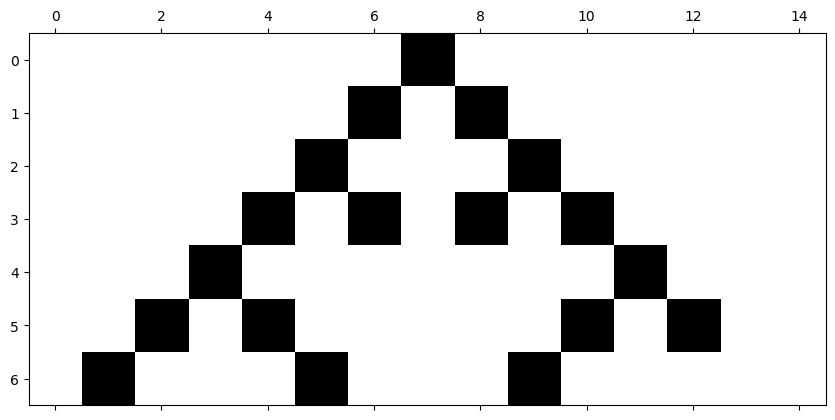

In [256]:
plt.matshow(matriz, cmap='binary')



## Referências

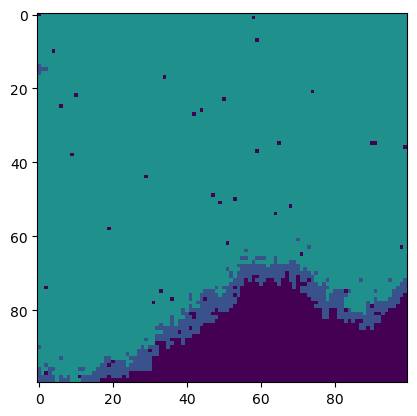

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Grid size
N = 100
infection_rate = 0.3  # Probability of infection from an infected neighbor
recovery_time = 10    # Time steps before an infected person recovers

# States
SUSCEPTIBLE = 0  # Blue
INFECTED = 1     # Red
RECOVERED = 2    # Green

# Initialize the grid
grid = np.zeros((N, N), dtype=int)

# Introduce a few initial infections randomly
num_initial_infected = 5
for _ in range(num_initial_infected):
    x, y = np.random.randint(0, N, 2)
    grid[x, y] = INFECTED

# Track infection time for each cell
infection_timer = np.zeros((N, N), dtype=int)

# Function to update the grid for each time step
def update(frame):
    global grid, infection_timer
    new_grid = grid.copy()
    
    for x in range(N):
        for y in range(N):
            if grid[x, y] == SUSCEPTIBLE:  # If susceptible, check neighbors
                neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                neighbors = [(i, j) for i, j in neighbors if 0 <= i < N and 0 <= j < N]
                if any(grid[i, j] == INFECTED for i, j in neighbors):
                    if np.random.rand() < infection_rate:
                        new_grid[x, y] = INFECTED  # Infection occurs
            
            elif grid[x, y] == INFECTED:  # If infected, update recovery timer
                infection_timer[x, y] += 1
                if infection_timer[x, y] >= recovery_time:
                    new_grid[x, y] = RECOVERED  # Recover after set time

    grid[:] = new_grid  # Update grid

    # Update visualization
    img.set_array(grid)
    return img,

# Set up the figure for animation
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap="viridis", vmin=0, vmax=2)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=False)


from IPython.display import HTML
HTML(ani.to_jshtml())

